1) Hipotesis: 

# EDA: Efectividad del saque en tenis según la superficie

## Pregunta de investigación
¿En qué superficie (arcilla, pista dura, hierba) es más alta la probabilidad de ganar un punto después del primer saque y después del segundo saque?

## Contexto
El tenis profesional se juega en distintas superficies. La velocidad y el bote de la pelota afectan la importancia del servicio.

## Hipótesis
- H1: En hierba el primer saque es más determinante (probabilidad más alta de ganar el punto).
- H2: En arcilla tanto el primer como el segundo saque son menos efectivos.
- H3: La pista dura estará en un punto intermedio.

## Datos
Usaremos la Sportradar Tennis v3 API, que da estadísticas por partido y por jugador:
- first_serve_successful
- first_serve_points_won
- second_serve_successful
- second_serve_points_won
y enlazaremos cada partido con la superficie del torneo.



In [1]:
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

plt.rcParams["figure.figsize"] = (8,5)


In [2]:
base_path = "tennis_atp-master"  # la carpeta que ya tienes

# listamos el primer nivel dentro de esa carpeta
print("Contenido de tennis_atp-master:")
for item in os.listdir(base_path):
    print(" -", item)

Contenido de tennis_atp-master:
 - atp_matches_2019.csv
 - atp_rankings_00s.csv
 - atp_matches_2024.csv
 - atp_matches_2018.csv
 - atp_matches_qual_chall_1999.csv
 - atp_matches_futures_2024.csv
 - atp_matches_futures_2018.csv
 - atp_rankings_20s.csv
 - atp_matches_futures_2019.csv
 - matches_data_dictionary.txt
 - atp_matches_qual_chall_1998.csv
 - atp_matches_2023.csv
 - atp_matches_qual_chall_1988.csv
 - atp_matches_futures_2009.csv
 - atp_matches_futures_2021.csv
 - atp_matches_futures_2020.csv
 - atp_matches_futures_2008.csv
 - atp_matches_qual_chall_1989.csv
 - atp_matches_2022.csv
 - atp_matches_2020.csv
 - atp_matches_2008.csv
 - atp_matches_futures_2022.csv
 - atp_matches_futures_2023.csv
 - atp_matches_2009.csv
 - atp_matches_2021.csv
 - atp_matches_futures_1997.csv
 - atp_matches_1981.csv
 - atp_matches_1995.csv
 - atp_matches_qual_chall_2016.csv
 - atp_matches_qual_chall_2002.csv
 - atp_matches_qual_chall_2003.csv
 - atp_matches_qual_chall_2017.csv
 - atp_matches_1994.csv
 

In [3]:


base_path = "tennis_atp-master"

# 1. ver qué hay dentro para asegurarnos de dónde están los CSV
print("Contenido de tennis_atp-master:")
for item in os.listdir(base_path):
    print(" -", item)

# 2. cargar todos los CSV que haya directamente en esa carpeta
csv_files = [f for f in os.listdir(base_path) if f.endswith(".csv")]

dfs = []
for filename in csv_files:
    full_path = os.path.join(base_path, filename)
    df_temp = pd.read_csv(full_path)
    df_temp["source_file"] = filename
    dfs.append(df_temp)

tenis_raw = pd.concat(dfs, ignore_index=True)

print("Filas totales:", len(tenis_raw))
tenis_raw.head()


Contenido de tennis_atp-master:
 - atp_matches_2019.csv
 - atp_rankings_00s.csv
 - atp_matches_2024.csv
 - atp_matches_2018.csv
 - atp_matches_qual_chall_1999.csv
 - atp_matches_futures_2024.csv
 - atp_matches_futures_2018.csv
 - atp_rankings_20s.csv
 - atp_matches_futures_2019.csv
 - matches_data_dictionary.txt
 - atp_matches_qual_chall_1998.csv
 - atp_matches_2023.csv
 - atp_matches_qual_chall_1988.csv
 - atp_matches_futures_2009.csv
 - atp_matches_futures_2021.csv
 - atp_matches_futures_2020.csv
 - atp_matches_futures_2008.csv
 - atp_matches_qual_chall_1989.csv
 - atp_matches_2022.csv
 - atp_matches_2020.csv
 - atp_matches_2008.csv
 - atp_matches_futures_2022.csv
 - atp_matches_futures_2023.csv
 - atp_matches_2009.csv
 - atp_matches_2021.csv
 - atp_matches_futures_1997.csv
 - atp_matches_1981.csv
 - atp_matches_1995.csv
 - atp_matches_qual_chall_2016.csv
 - atp_matches_qual_chall_2002.csv
 - atp_matches_qual_chall_2003.csv
 - atp_matches_qual_chall_2017.csv
 - atp_matches_1994.csv
 

/var/folders/dt/0d8pwpsd2yxdm8b0d640_wn40000gn/T/ipykernel_66670/3240939031.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(full_path)
/var/folders/dt/0d8pwpsd2yxdm8b0d640_wn40000gn/T/ipykernel_66670/3240939031.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(full_path)


Filas totales: 4326986


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser2_rank,loser2_rank_points,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,2019-M020,Brisbane,Hard,32,A,20181231.0,300,105453.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-M020,Brisbane,Hard,32,A,20181231.0,299,106421.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-M020,Brisbane,Hard,32,A,20181231.0,298,105453.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-M020,Brisbane,Hard,32,A,20181231.0,297,104542.0,NaN,PR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-M020,Brisbane,Hard,32,A,20181231.0,296,106421.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
import numpy as np

df = tenis_raw.copy()

# calcula % de puntos ganados con primer saque del ganador
if {"w_1stWon","w_1stIn","surface"}.issubset(df.columns):
    df["win_first_pct"] = np.where(df["w_1stIn"] > 0,
                                   df["w_1stWon"] / df["w_1stIn"],
                                   np.nan)

# calcula % de puntos ganados con segundo saque del ganador
# en algunos datasets viene w_2ndWon y w_2ndIn; en otros solo w_2ndWon y w_svpt
possible_cols = set(df.columns)

if {"w_2ndWon","w_svpt","w_1stIn"}.issubset(possible_cols):
    # aproximación clásica:
    # segundos sacados ≈ total puntos al saque - primeros saques dentro
    df["w_2ndIn_est"] = df["w_svpt"] - df["w_1stIn"]
    df["win_second_pct"] = np.where(df["w_2ndIn_est"] > 0,
                                    df["w_2ndWon"] / df["w_2ndIn_est"],
                                    np.nan)

# agrupar por superficie
resumen_superficie = (
    df.groupby("surface")[["win_first_pct","win_second_pct"]]
    .mean()
    .sort_values("win_first_pct", ascending=False)
)

resumen_superficie


,win_first_pct,win_second_pct
surface,,
Carpet,0.795728,0.567132
Grass,0.789254,0.565362
Hard,0.769647,0.564346
Clay,0.732349,0.555053
8,NaN,NaN
...,...,...
48,NaN,NaN
56,NaN,NaN
64,NaN,NaN


In [4]:
import numpy as np
import pandas as pd

df = tenis_raw.copy()

# 1. Nos quedamos con columnas clave si existen
cols_posibles = [
    "surface",
    "w_1stIn", "w_1stWon",
    "w_svpt", "w_2ndWon",
    "l_1stIn", "l_1stWon",
    "l_svpt", "l_2ndWon",
    "winner_name", "loser_name"
]

cols_existentes = [c for c in cols_posibles if c in df.columns]
df = df[cols_existentes].copy()

# 2. Para el jugador ganador:
#   % puntos ganados con primer saque = w_1stWon / w_1stIn
if {"w_1stWon","w_1stIn"}.issubset(df.columns):
    df["winner_first_pct"] = np.where(
        df["w_1stIn"] > 0,
        df["w_1stWon"] / df["w_1stIn"],
        np.nan
    )
else:
    df["winner_first_pct"] = np.nan

#   % puntos ganados con segundo saque:
#   necesitamos estimar cuántos segundos saques entraron.
#   aproximación estándar:
#   puntos jugados al saque total (w_svpt)
#   menos primeros saques que entraron (w_1stIn)
#   = número aproximado de segundos saques jugados
if {"w_svpt","w_1stIn","w_2ndWon"}.issubset(df.columns):
    df["w_2ndIn_est"] = df["w_svpt"] - df["w_1stIn"]
    df["winner_second_pct"] = np.where(
        df["w_2ndIn_est"] > 0,
        df["w_2ndWon"] / df["w_2ndIn_est"],
        np.nan
    )
else:
    df["winner_second_pct"] = np.nan

# 3. (Opcional) repetir para el perdedor
if {"l_1stWon","l_1stIn"}.issubset(df.columns):
    df["loser_first_pct"] = np.where(
        df["l_1stIn"] > 0,
        df["l_1stWon"] / df["l_1stIn"],
        np.nan
    )
else:
    df["loser_first_pct"] = np.nan

if {"l_svpt","l_1stIn","l_2ndWon"}.issubset(df.columns):
    df["l_2ndIn_est"] = df["l_svpt"] - df["l_1stIn"]
    df["loser_second_pct"] = np.where(
        df["l_2ndIn_est"] > 0,
        df["l_2ndWon"] / df["l_2ndIn_est"],
        np.nan
    )
else:
    df["loser_second_pct"] = np.nan

df.head()


,surface,w_1stIn,w_1stWon,w_svpt,w_2ndWon,l_1stIn,l_1stWon,l_svpt,l_2ndWon,winner_name,loser_name,winner_first_pct,w_2ndIn_est,winner_second_pct,loser_first_pct,l_2ndIn_est,loser_second_pct
0,Hard,44.0,31.0,77.0,17.0,54.0,34.0,100.0,20.0,Kei Nishikori,Daniil Medvedev,0.704545,33.0,0.515152,0.629630,46.0,0.434783
1,Hard,33.0,28.0,52.0,14.0,52.0,36.0,77.0,7.0,Daniil Medvedev,Jo-Wilfried Tsonga,0.848485,19.0,0.736842,0.692308,25.0,0.280000
2,Hard,33.0,26.0,47.0,9.0,27.0,15.0,46.0,6.0,Kei Nishikori,Jeremy Chardy,0.787879,14.0,0.642857,0.555556,19.0,0.315789
3,Hard,43.0,34.0,68.0,15.0,60.0,38.0,81.0,9.0,Jo-Wilfried Tsonga,Alex De Minaur,0.790698,25.0,0.600000,0.633333,21.0,0.428571
4,Hard,68.0,48.0,105.0,25.0,56.0,46.0,94.0,19.0,Daniil Medvedev,Milos Raonic,0.705882,37.0,0.675676,0.821429,38.0,0.500000


In [18]:
resumen_surface = (
    df.groupby("surface")[[
        "winner_first_pct",
        "winner_second_pct",
        "loser_first_pct",
        "loser_second_pct"
    ]]
    .mean()
    .sort_values("winner_first_pct", ascending=False)
)

resumen_surface


,winner_first_pct,winner_second_pct,loser_first_pct,loser_second_pct
surface,,,,
Carpet,0.795728,0.567132,0.689642,0.458255
Grass,0.789254,0.565362,0.687046,0.459975
Hard,0.769647,0.564346,0.657076,0.446881
Clay,0.732349,0.555053,0.615029,0.433763
8,NaN,NaN,NaN,NaN
...,...,...,...,...
48,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN


In [19]:
matches_dfs = []

for filename in os.listdir(base_path):
    # Nos interesan solo archivos de partidos ATP, normalmente llamados así:
    # atp_matches_YYYY.csv
    if filename.startswith("atp_matches_") and filename.endswith(".csv"):
        if ("2024" in filename) or ("2023" in filename):
            full_path = os.path.join(base_path, filename)
            df_year = pd.read_csv(full_path)
            matches_dfs.append(df_year)

# Unimos 2023 + 2024 en una sola tabla grande
matches_raw = pd.concat(matches_dfs, ignore_index=True)

print("Filas totales cargadas:", len(matches_raw))
matches_raw.head()


Filas totales cargadas: 63964


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


In [20]:
matches_raw.columns.tolist()


['tourney_id',
 'tourney_name',
 'surface',
 'draw_size',
 'tourney_level',
 'tourney_date',
 'match_num',
 'winner_id',
 'winner_seed',
 'winner_entry',
 'winner_name',
 'winner_hand',
 'winner_ht',
 'winner_ioc',
 'winner_age',
 'loser_id',
 'loser_seed',
 'loser_entry',
 'loser_name',
 'loser_hand',
 'loser_ht',
 'loser_ioc',
 'loser_age',
 'score',
 'best_of',
 'round',
 'minutes',
 'w_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced',
 'l_ace',
 'l_df',
 'l_svpt',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_bpSaved',
 'l_bpFaced',
 'winner_rank',
 'winner_rank_points',
 'loser_rank',
 'loser_rank_points']

In [21]:
rows = []

for idx, row in matches_raw.iterrows():
    surface = row.get("surface")

    # ===== JUGADOR GANADOR =====
    w_player = row.get("winner_name")
    w_svpt   = row.get("w_svpt")    # puntos totales jugados al saque
    w_1stIn  = row.get("w_1stIn")   # primeros saques que entraron
    w_1stWon = row.get("w_1stWon")  # puntos ganados tras primer saque
    w_2ndWon = row.get("w_2ndWon")  # puntos ganados tras segundo saque

    # cálculo % ganar punto tras primer saque
    if pd.notna(w_svpt) and pd.notna(w_1stIn) and pd.notna(w_1stWon) and pd.notna(w_2ndWon):
        if w_1stIn and w_1stIn != 0:
            w_p1st = w_1stWon / w_1stIn
        else:
            w_p1st = np.nan

        # para el segundo saque estimamos cuántos segundos saques se jugaron:
        # segundos saques jugados ≈ total puntos al saque - primeros saques que entraron
        denom_second = w_svpt - w_1stIn if (pd.notna(w_svpt) and pd.notna(w_1stIn)) else np.nan
        if denom_second and denom_second != 0:
            w_p2nd = w_2ndWon / denom_second
        else:
            w_p2nd = np.nan
    else:
        w_p1st = np.nan
        w_p2nd = np.nan

    rows.append({
        "player_name": w_player,
        "surface": surface,
        "p1st": w_p1st,   # prob ganar punto tras primer saque
        "p2nd": w_p2nd,   # prob ganar punto tras segundo saque
        "role": "winner"
    })

    # ===== JUGADOR PERDEDOR =====
    l_player = row.get("loser_name")
    l_svpt   = row.get("l_svpt")
    l_1stIn  = row.get("l_1stIn")
    l_1stWon = row.get("l_1stWon")
    l_2ndWon = row.get("l_2ndWon")

    if pd.notna(l_svpt) and pd.notna(l_1stIn) and pd.notna(l_1stWon) and pd.notna(l_2ndWon):
        if l_1stIn and l_1stIn != 0:
            l_p1st = l_1stWon / l_1stIn
        else:
            l_p1st = np.nan

        denom_second_l = l_svpt - l_1stIn if (pd.notna(l_svpt) and pd.notna(l_1stIn)) else np.nan
        if denom_second_l and denom_second_l != 0:
            l_p2nd = l_2ndWon / denom_second_l
        else:
            l_p2nd = np.nan
    else:
        l_p1st = np.nan
        l_p2nd = np.nan

    rows.append({
        "player_name": l_player,
        "surface": surface,
        "p1st": l_p1st,
        "p2nd": l_p2nd,
        "role": "loser"
    })

df_clean = pd.DataFrame(rows)

# limpiamos infinitos / basura
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# quitamos filas sin superficie o sin métricas
df_clean = df_clean.dropna(subset=["surface", "p1st", "p2nd"]).copy()

df_clean.head()


,player_name,surface,p1st,p2nd,role
0,Grigor Dimitrov,Hard,0.769231,0.590909,winner
1,Holger Rune,Hard,0.758621,0.432432,loser
2,Holger Rune,Hard,0.812500,0.458333,winner
3,Roman Safiullin,Hard,0.885714,0.322581,loser
4,Grigor Dimitrov,Hard,0.866667,0.454545,winner


In [22]:
summary_by_surface = (
    df_clean
    .groupby("surface")[["p1st", "p2nd"]]
    .agg(["mean", "std", "count"])
)

summary_by_surface


p1st                       p2nd                 
             mean       std  count      mean       std  count
surface                                                      
Carpet   0.787711  0.080205     98  0.544490  0.128886     98
Clay     0.670565  0.107865  24212  0.493191  0.124857  24212
Grass    0.739190  0.094929   2664  0.524714  0.115540   2664
Hard     0.710530  0.103726  28177  0.505363  0.122731  28177

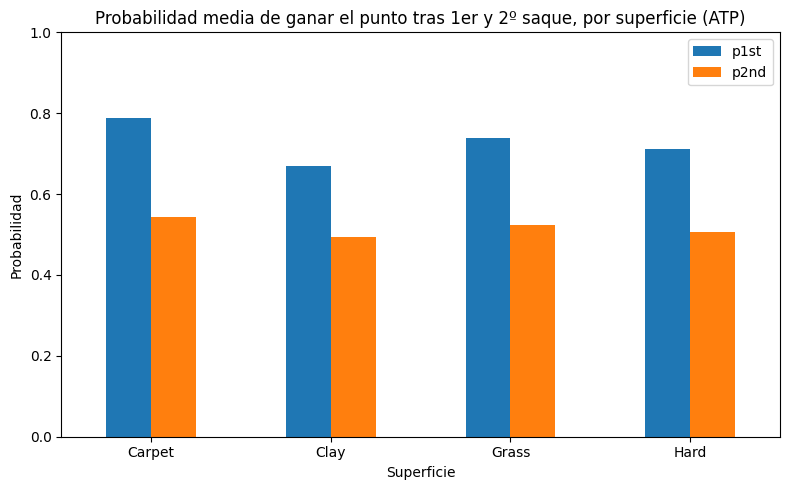

In [23]:
surface_means = (
    df_clean
    .groupby("surface")[["p1st","p2nd"]]
    .mean()
    .sort_index()
)

ax = surface_means.plot(kind="bar")
plt.title("Probabilidad media de ganar el punto tras 1er y 2º saque, por superficie (ATP)")
plt.ylabel("Probabilidad")
plt.xlabel("Superficie")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.tight_layout()
plt.show()


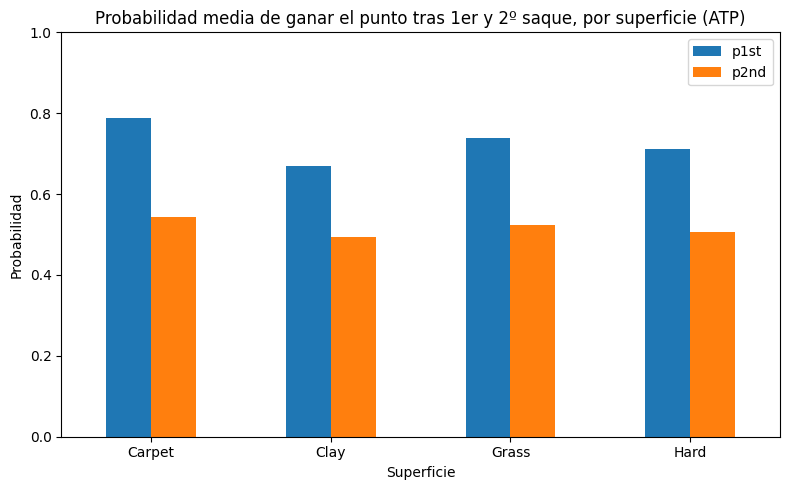

In [24]:
ax = surface_means.plot(kind="bar")
plt.title("Probabilidad media de ganar el punto tras 1er y 2º saque, por superficie (ATP)")
plt.ylabel("Probabilidad")
plt.xlabel("Superficie")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("barras_superficie.png", dpi=300)
plt.show()


<Figure size 800x500 with 0 Axes>

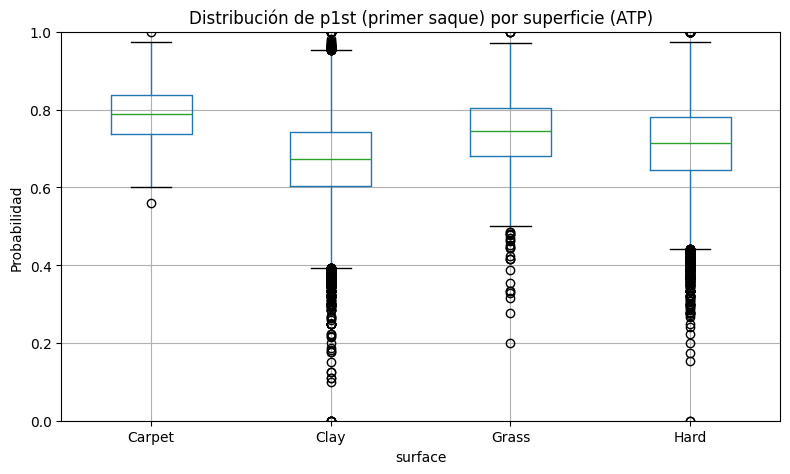

<Figure size 800x500 with 0 Axes>

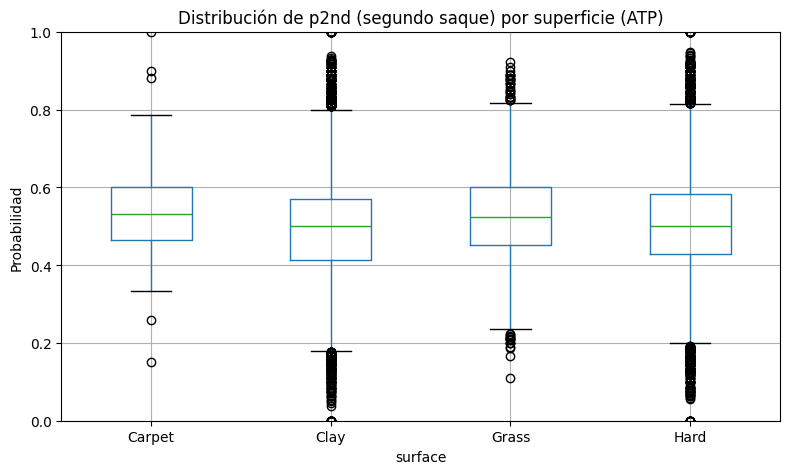

In [25]:
plt.figure(figsize=(8,5))
df_clean.boxplot(column="p1st", by="surface")
plt.title("Distribución de p1st (primer saque) por superficie (ATP)")
plt.suptitle("")
plt.ylabel("Probabilidad")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("boxplot_p1st.png", dpi=300)
plt.show()

plt.figure(figsize=(8,5))
df_clean.boxplot(column="p2nd", by="surface")
plt.title("Distribución de p2nd (segundo saque) por superficie (ATP)")
plt.suptitle("")
plt.ylabel("Probabilidad")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("boxplot_p2nd.png", dpi=300)
plt.show()


# **TOP 10 --> ATP**


In [26]:
top10_players = [
    "Novak Djokovic",
    "Carlos Alcaraz",
    "Jannik Sinner",
    "Daniil Medvedev",
    "Alexander Zverev",
    "Andrey Rublev",
    "Holger Rune",
    "Casper Ruud",
    "Stefanos Tsitsipas",
    "Hubert Hurkacz"
]


In [27]:
rows = []

for idx, row in matches_raw.iterrows():
    surface = row.get("surface")

    # ===== ESTADÍSTICAS DEL GANADOR =====
    w_player = row.get("winner_name")
    w_svpt   = row.get("w_svpt")
    w_1stIn  = row.get("w_1stIn")
    w_1stWon = row.get("w_1stWon")
    w_2ndWon = row.get("w_2ndWon")

    if pd.notna(w_svpt) and pd.notna(w_1stIn) and pd.notna(w_1stWon) and pd.notna(w_2ndWon):
        if w_1stIn and w_1stIn != 0:
            w_p1st = w_1stWon / w_1stIn
        else:
            w_p1st = np.nan

        denom_second = w_svpt - w_1stIn if (pd.notna(w_svpt) and pd.notna(w_1stIn)) else np.nan
        if denom_second and denom_second != 0:
            w_p2nd = w_2ndWon / denom_second
        else:
            w_p2nd = np.nan
    else:
        w_p1st = np.nan
        w_p2nd = np.nan

    rows.append({
        "player_name": w_player,
        "surface": surface,
        "p1st": w_p1st,
        "p2nd": w_p2nd,
        "role": "winner"
    })

    # ===== ESTADÍSTICAS DEL PERDEDOR =====
    l_player = row.get("loser_name")
    l_svpt   = row.get("l_svpt")
    l_1stIn  = row.get("l_1stIn")
    l_1stWon = row.get("l_1stWon")
    l_2ndWon = row.get("l_2ndWon")

    if pd.notna(l_svpt) and pd.notna(l_1stIn) and pd.notna(l_1stWon) and pd.notna(l_2ndWon):
        if l_1stIn and l_1stIn != 0:
            l_p1st = l_1stWon / l_1stIn
        else:
            l_p1st = np.nan

        denom_second_l = l_svpt - l_1stIn if (pd.notna(l_svpt) and pd.notna(l_1stIn)) else np.nan
        if denom_second_l and denom_second_l != 0:
            l_p2nd = l_2ndWon / denom_second_l
        else:
            l_p2nd = np.nan
    else:
        l_p1st = np.nan
        l_p2nd = np.nan

    rows.append({
        "player_name": l_player,
        "surface": surface,
        "p1st": l_p1st,
        "p2nd": l_p2nd,
        "role": "loser"
    })

df_clean = pd.DataFrame(rows)

# Limpieza básica
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = df_clean.dropna(subset=["surface", "p1st", "p2nd"]).copy()

# 🔴 FILTRAMOS SOLO TOP 10
df_top10 = df_clean[df_clean["player_name"].isin(top10_players)].copy()

df_top10.head()


,player_name,surface,p1st,p2nd,role
1,Holger Rune,Hard,0.758621,0.432432,loser
2,Holger Rune,Hard,0.812500,0.458333,winner
6,Holger Rune,Hard,0.861111,0.586207,winner
14,Holger Rune,Hard,0.754386,0.647059,winner
30,Holger Rune,Hard,0.741379,0.571429,winner


In [28]:
summary_top10_surface = (
    df_top10
    .groupby("surface")[["p1st","p2nd"]]
    .agg(["mean", "std", "count"])
)

summary_top10_surface


p1st                      p2nd                
             mean       std count      mean       std count
surface                                                    
Clay     0.733611  0.091334   407  0.546775  0.119359   407
Grass    0.786824  0.068002   146  0.555944  0.096905   146
Hard     0.765495  0.081541   861  0.549061  0.118073   861

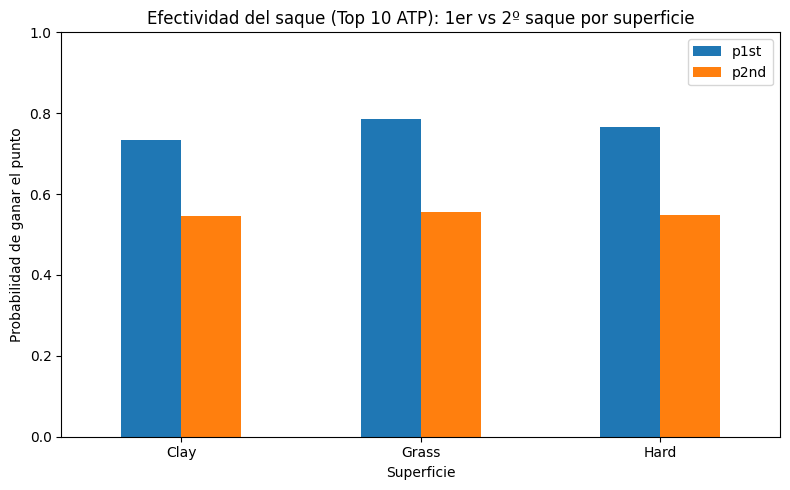

In [29]:
surface_means_top10 = (
    df_top10
    .groupby("surface")[["p1st","p2nd"]]
    .mean()
    .sort_index()
)

ax = surface_means_top10.plot(kind="bar")
plt.title("Efectividad del saque (Top 10 ATP): 1er vs 2º saque por superficie")
plt.ylabel("Probabilidad de ganar el punto")
plt.xlabel("Superficie")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("barras_superficie_top10.png", dpi=300)
plt.show()


<Figure size 800x500 with 0 Axes>

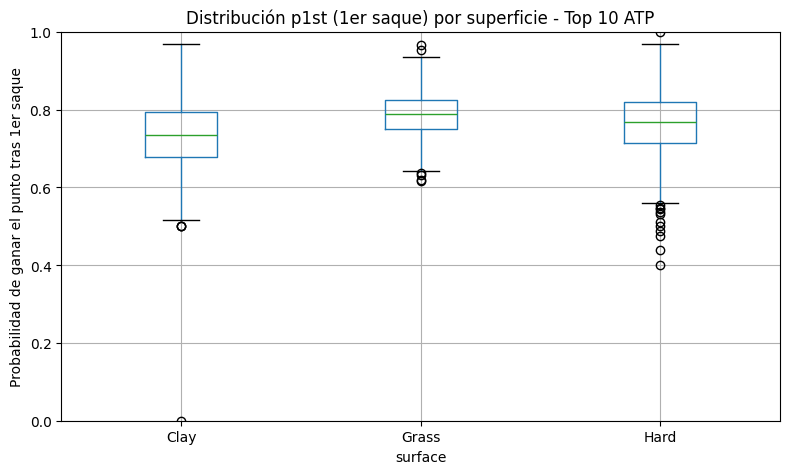

<Figure size 800x500 with 0 Axes>

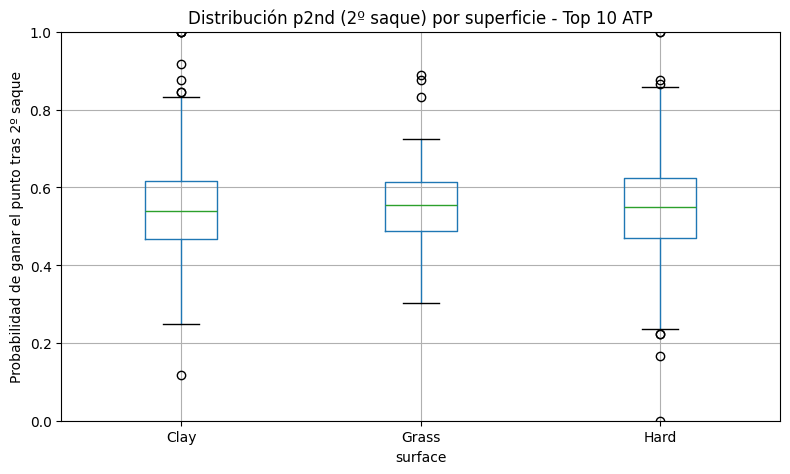

In [30]:
plt.figure(figsize=(8,5))
df_top10.boxplot(column="p1st", by="surface")
plt.title("Distribución p1st (1er saque) por superficie - Top 10 ATP")
plt.suptitle("")
plt.ylabel("Probabilidad de ganar el punto tras 1er saque")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("boxplot_p1st_top10.png", dpi=300)
plt.show()

plt.figure(figsize=(8,5))
df_top10.boxplot(column="p2nd", by="surface")
plt.title("Distribución p2nd (2º saque) por superficie - Top 10 ATP")
plt.suptitle("")
plt.ylabel("Probabilidad de ganar el punto tras 2º saque")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("boxplot_p2nd_top10.png", dpi=300)
plt.show()


In [31]:
df_top10 = df_clean[df_clean["player_name"].isin(top10_players)]


In [ ]:
df_clean["player_name"].unique()[:40] #TOP 40


array(['Grigor Dimitrov', 'Holger Rune', 'Roman Safiullin',
       'Jordan Thompson', 'James Duckworth', 'Matteo Arnaldi',
       'Rafael Nadal', 'Rinky Hijikata', 'Alexander Shevchenko',
       'Yannick Hanfmann', 'Alexei Popyrin', 'Lukas Klein',
       'Jason Kubler', 'Tomas Machac', 'Daniel Altmaier', 'Max Purcell',
       'Luca Van Assche', 'J J Wolf', 'Sebastian Korda', 'Ben Shelton',
       'Christopher Oconnell', 'Marton Fucsovics', 'Sebastian Baez',
       'Aslan Karatsev', 'Dominic Thiem', 'Aleksandar Vukic',
       'Ugo Humbert', 'Alex Michelsen', 'Tomas Martin Etcheverry',
       'Thanasi Kokkinakis', 'Li Tu', 'Andy Murray', 'Alexander Zverev',
       'Hubert Hurkacz', 'Adrian Mannarino', 'Alex De Minaur',
       'Zhizhen Zhang', 'Casper Ruud', 'Novak Djokovic',
       'Stefanos Tsitsipas'], dtype=object)

# top 10 historic players

In [33]:
historic_top10_players = [
    "Novak Djokovic",
    "Roger Federer",
    "Rafael Nadal",
    "Andy Murray",
    "Pete Sampras",
    "Andre Agassi",
    "Carlos Alcaraz",
    "Jannik Sinner",
    "Daniil Medvedev",
    "Alexander Zverev",
    "Stefanos Tsitsipas",
    "Casper Ruud",
    "Andrey Rublev",
    "Juan Martin Del Potro",
    "Stan Wawrinka",
    "Marat Safin",
    "Carlos Moyá",
    "Lleyton Hewitt",
    "Gustavo Kuerten",
    "David Ferrer"
]


In [34]:
df_hist = df_clean[df_clean["player_name"].isin(historic_top10_players)].copy()

print("Número de filas después de filtrar (solo leyendas/top10 históricos):", len(df_hist))
df_hist.head()


Número de filas después de filtrar (solo leyendas/top10 históricos): 1330


,player_name,surface,p1st,p2nd,role
11,Rafael Nadal,Hard,0.734177,0.448276,loser
22,Rafael Nadal,Hard,0.800000,0.625000,winner
48,Rafael Nadal,Hard,0.903226,0.800000,winner
61,Andy Murray,Hard,0.627451,0.600000,loser
62,Alexander Zverev,Hard,0.861111,0.583333,winner


In [35]:
alltime_summary = df_hist[["p1st","p2nd"]].mean()
alltime_summary


p1st    0.754712
p2nd    0.548253
dtype: float64

In [36]:
alltime_p1st_pct = alltime_summary["p1st"] * 100
alltime_p2nd_pct = alltime_summary["p2nd"] * 100

print(f"All-time elite p1st win%: {alltime_p1st_pct:.2f}%")
print(f"All-time elite p2nd win%: {alltime_p2nd_pct:.2f}%")


All-time elite p1st win%: 75.47%
All-time elite p2nd win%: 54.83%


In [37]:
surface_summary_hist = (
    df_hist
    .groupby("surface")[["p1st","p2nd"]]
    .mean()
    .sort_index()
)

surface_summary_hist


,p1st,p2nd
surface,,
Clay,0.729415,0.544761
Grass,0.779149,0.565389
Hard,0.763465,0.547069


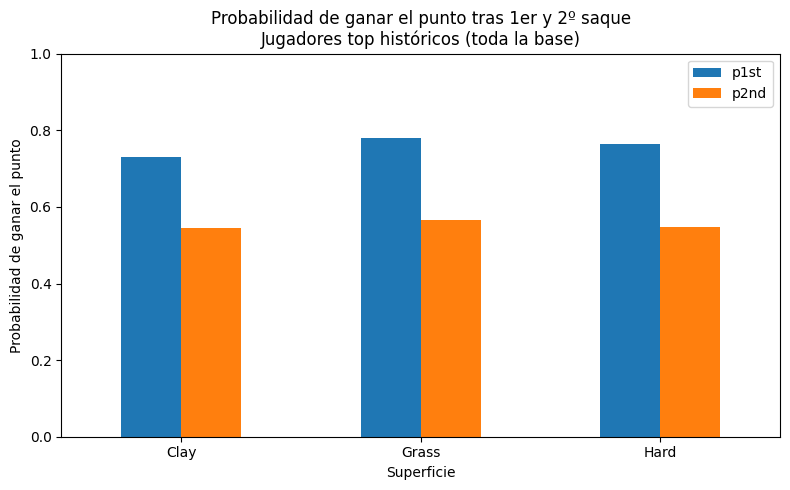

In [38]:
ax = surface_summary_hist.plot(kind="bar")
plt.title("Probabilidad de ganar el punto tras 1er y 2º saque\nJugadores top históricos (toda la base)")
plt.ylabel("Probabilidad de ganar el punto")
plt.xlabel("Superficie")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("barras_superficie_historic_top10.png", dpi=300)
plt.show()


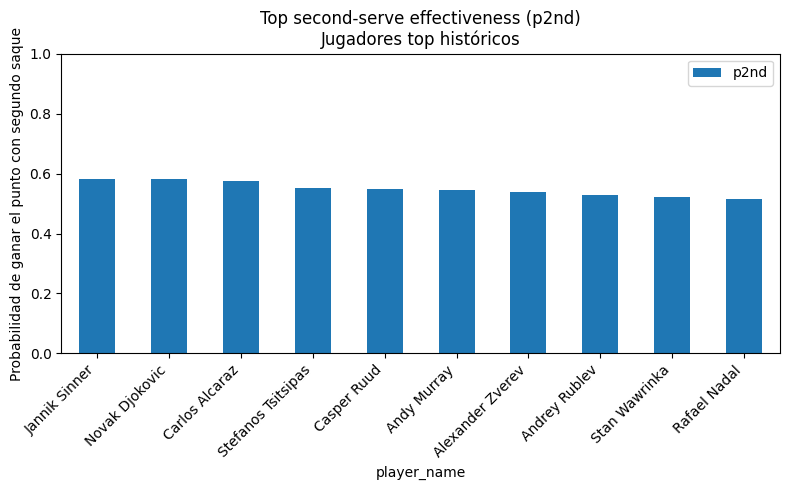

In [39]:
top_second = (
    df_hist
    .groupby("player_name")[["p2nd"]]
    .mean()
    .sort_values("p2nd", ascending=False)
    .head(10)
)

ax = top_second.plot(kind="bar")
plt.title("Top second-serve effectiveness (p2nd)\nJugadores top históricos")
plt.ylabel("Probabilidad de ganar el punto con segundo saque")
plt.xticks(rotation=45, ha="right")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("top_second_serve_historic.png", dpi=300)
plt.show()
